# Upsampling via the FFT (a tutorial on what not to do)

In [1]:
from pylab import *

Let's start with a simple complex sinusoid $x(t) = e^{j 2 \pi f t}$:

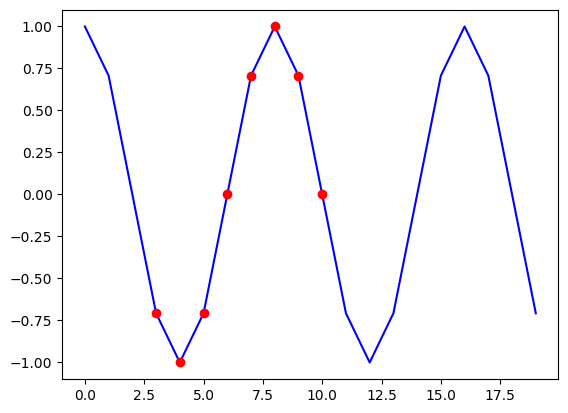

In [2]:
N = 20
L = 8
f1 = 1/L
t = r_[:N]
x1 = exp(1j*2*pi*f1*t)
n = 3 # arbitrary offset into signal
ax = plot(t, real(x1), 'b', t[n:n+L], real(x1[n:n+L]), 'ro')

And let's look at the L-point FFT of the section highlighted in red:

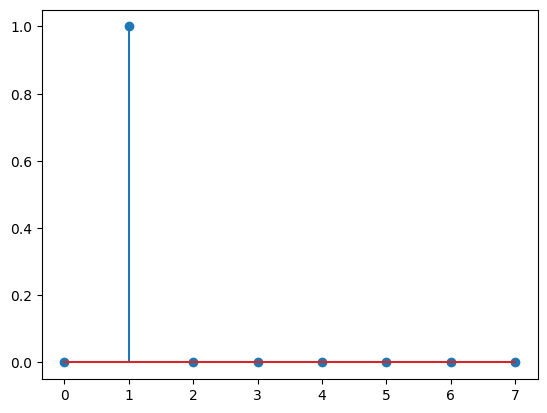

In [3]:
X1 = fft(x1[n:n+L]/L)
ax = stem(abs(X1))

If we zero pad this FFT by a factor of $M$, and then take the $M$-point IFFT, we get what we would expect:

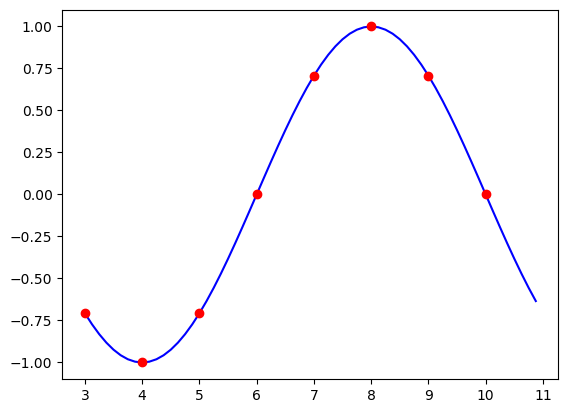

In [15]:
M = 8
N = M * L
Y1 = zeros(N, dtype=complex)
Y1[(N-L)//2:(N+L)//2] = fftshift(X1)
y1 = len(Y1) * ifft(ifftshift(Y1))
tM = r_[:M*L]/M + n
ax = plot(tM, real(y1), 'b', t[n:n+L], real(x1[n:n+L]), 'ro')

It is a nice, smooth, upsampled version of the highlighted section.

Now let's try the experiment again, but with a frequency that doesn't land conveniently at an FFT bin center:

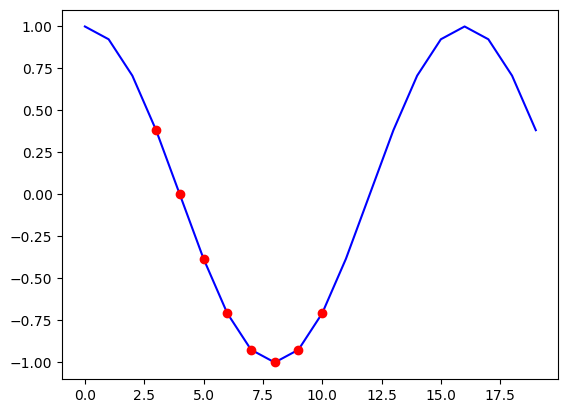

In [5]:
f2 = 0.5/L
x2 = exp(1j*2*pi*f2*t)
ax = plot(t, real(x2), 'b', t[n:n+L], real(x2[n:n+L]), 'ro')

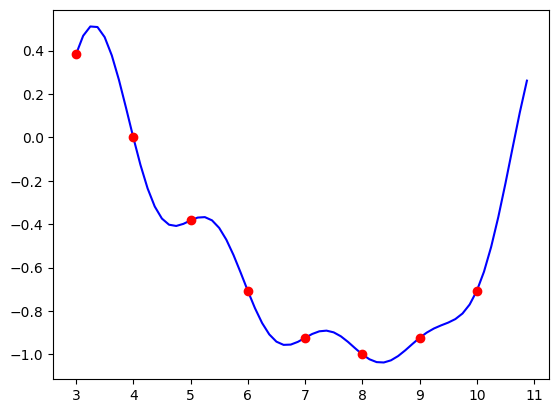

In [17]:
X2 = fft(x2[n:n+L]/L)
Y2 = zeros(M*L, dtype=complex)
Y2[(N-L)//2:(N+L)//2] = fftshift(X2)
y2 = len(Y2) * ifft(ifftshift(Y2))
ax = plot(tM, real(y2), 'b', t[n:n+L], real(x2[n:n+L]), 'ro')

That is not at all the upsampling we expected.  Let's take a look at the original $L$-point FFT

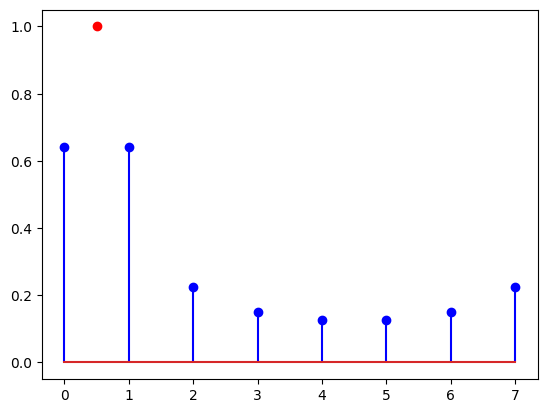

In [7]:
ax = stem(r_[:L], abs(X2), linefmt='b', markerfmt='bo')
ax = plot([0.5], [1], 'ro')

The red dot shows where the actual frequency lies, but because it straddles bins, its energy is spread across all of the bins.

Let's compare that FFT output to the FFT of that same sinusoid if it is upsampled properly:

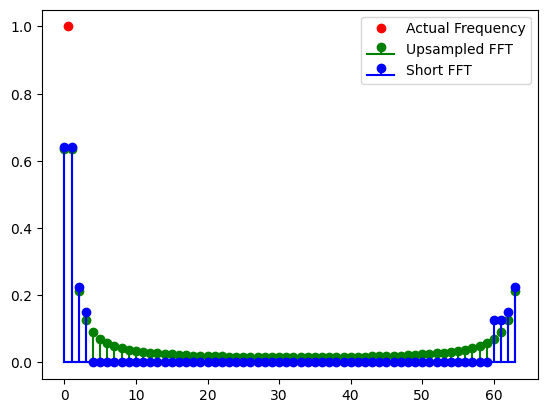

In [19]:
t2_upM = r_[:N*M]/M
x2_upM = exp(1j*2*pi*f2*t2_upM)
# ax = plot(t2_upM, x2_upM, 'b', t2_upM[n*M:(n+L)*M], x2_upM[n*M:(n+L)*M], 'r')
X2M = fft(x2_upM[n*M:(n+L)*M]/(M*L))
ax = stem(abs(X2M), basefmt='g', linefmt='g', markerfmt='go', label='Upsampled FFT')
ax = stem(abs(ifftshift(Y2)), basefmt='b', linefmt='b', markerfmt='bo', label='Short FFT')
ax = plot([0.5], [1], 'ro', label='Actual Frequency')
hl = legend()

This shows that we cannot reliably upsample a signal by simply zero-padding its FFT